## Exploratory data analysis of retail data

In [1]:
import pandas as pd
import numpy as np

#### Viewing the datframe

In [2]:
customer_activity = pd.read_csv('customer_activity.csv')
customer_activity.head(10)

,Unnamed: 0,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,3,0.0,0.0,0,0.0,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,4,0.0,0.0,0,0.0,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
5,5,1.0,63.0,0,0.0,29.0,579.0,0.0194,0.023,0.0,Mar,MACOS,Safari,North America,Google search,Returning_Visitor,False,False
6,6,3.0,87.0,0,0.0,11.0,1400.0,0.0000,0.022,0.0,Mar,Android,Google Chrome,Western Europe,Google search,New_Visitor,True,False
7,7,0.0,0.0,0,0.0,NaN,1134.0,0.0033,0.018,0.0,Dec,MACOS,Safari,North America,Youtube channel,New_Visitor,False,False
8,8,0.0,0.0,0,0.0,3.0,17.0,0.0400,0.120,0.0,June,Windows,Microsoft Edge,North America,Instagram ads,Returning_Visitor,False,False
9,9,4.0,15.8,0,0.0,11.0,340.0,0.0000,0.016,0.0,Aug,Windows,Microsoft Edge,South America,Instagram Page,New_Visitor,False,False


### dataframe information

In [3]:
customer_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                12330 non-null  int64  
 1   administrative            11760 non-null  float64
 2   administrative_duration   11418 non-null  float64
 3   informational             12330 non-null  int64  
 4   informational_duration    11994 non-null  float64
 5   product_related           11751 non-null  float64
 6   product_related_duration  12129 non-null  float64
 7   bounce_rates              12330 non-null  float64
 8   exit_rates                12330 non-null  float64
 9   page_values               12330 non-null  float64
 10  month                     12330 non-null  object 
 11  operating_systems         12319 non-null  object 
 12  browser                   12330 non-null  object 
 13  region                    12330 non-null  object 
 14  traffi

### Class creation

In [4]:
class DataTransform:

    def __init__(self, target_dataframe):
        self.target_dataframe = target_dataframe
    
    def column_to_int(self, target_column):
        #converts a column datatype to init64. Returns dataframe
        self.target_dataframe[target_column] = self.target_dataframe[target_column].astype('int64', errors='ignore')
        return self.target_dataframe
    
    def column_to_category(self, target_column):
        #converts column datatype to category. returns dataframe
        self.target_dataframe[target_column] = self.target_dataframe[target_column].astype('category')
        return self.target_dataframe
    

In [5]:
from scipy.stats import normaltest

class DataFrameInfo:
    
    def __init__(self, target_dataframe):
        self.target_dataframe = target_dataframe

    def get_info(self):
        #returns info of the class dataframe
        return self.target_dataframe.info()
    
    def get_column_mean(self, target_column):
        # returns the mean of a selected column
        mean = self.target_dataframe[target_column].mean()
        print(f'Mean of {target_column} is {mean}')
        return mean
    
    def get_column_median(self, target_column):
        # returns the median of a selected column
        median = self.target_dataframe[target_column].median()
        print(f'Median of {target_column} is {median}')
        return median
    
    def get_column_mode(self, target_column):
        # returns the mode of a selected column
        mode = self.target_dataframe[target_column].mode()
        print(f'Mode of {target_column} is {mode}')
        return mode
    
    def get_standard_deviation(self):
        # returns the standard deviation of a selected column
        standard_deviation = self.target_dataframe.std(numeric_only=True)
        return standard_deviation
    
    def get_variance(self):
        # returns the variance of a selected column
        variance = self.target_dataframe.var(numeric_only=True)
        return variance

    def count_distinct_categories(self, target_column):
        # returns the number of distinct categories in a category column
        distinct_categories = self.target_dataframe[target_column].nunique()
        print(f'{distinct_categories} distinct categories in {target_column}')
        return distinct_categories
    
    def get_shape(self):
        # returns the shape of the class dataframe
        df_shape = self.target_dataframe.shape
        return df_shape
    
    def count_null(self):
        # returns a dataframe of the sum of nulls in each column of the class dataframe
        null_count = self.target_dataframe.isnull().sum()
        return null_count

    def null_percentage(self):
        # returns a dataframe of the percentage of nulls in in column of the class dataframe
        percent_null = self.target_dataframe.isnull().sum()/len(self.target_dataframe)
        return percent_null
    
    # D'Agostino's K^2 Test
    def normal_test(self, target_column):
        # returns the normality of a column in the class dataframe
        stat, p = normaltest(self.target_dataframe[target_column], nan_policy='omit')
        print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    def describe_column(self, target_column):
        description = self.target_dataframe[target_column].describe()
        return description
    
    

In [6]:
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns

class Plotter:

    def __init__(self, target_dataframe):
        self.target_dataframe = target_dataframe

    def create_hist(self, target_column):
        # plots a histogram of a selected column
        hist = self.target_dataframe[target_column].hist(bins=20)
        return hist
    
    def create_qqplot(self, target_column):
        # plots a qqplot of a selected column
        qq = plt.show( qqplot(self.target_dataframe[target_column], scale=1 , line='q'))
        return qq

    def show_skew(self, target_column):
        self.target_dataframe[target_column].hist(bins=20)
        skew_value = self.target_dataframe[target_column].skew()
        print(f'The skew of {target_column} is: {skew_value}')

    def scatter_plot(self, x_axis, y_axis):
        sns.scatterplot(x=self.target_dataframe[x_axis], y=self.target_dataframe[y_axis])

    def box_plot(self, target_column):
        column = self.target_dataframe[target_column]
        value_set = column.unique()
        plt.figure(figsize=(10, 5))
        sns.boxplot(y=column, color='lightgreen', showfliers=True)
        sns.swarmplot(y=value_set, color='black', size=5)



class DataFrameTransform:

    def __init__(self, target_dataframe):
        self.target_dataframe = target_dataframe

    def drop_column(self, target_column):
        # removes a whole column
        self.target_dataframe = self.target_dataframe.drop(target_column, axis='columns')
        return self.target_dataframe
    
    def drop_missing_values_in_column(self, target_column):
        # used to remove all rows with missing values in a specific column
        # only used when the number of missing values in a column is low
        self.target_dataframe = self.target_dataframe.dropna(subset=[target_column])
        return self.target_dataframe
    
    def median_imputation(self, target_column):
        # changes all null values in a column to the column median
        # used when the data has a non guassian/normal distribution
        self.target_dataframe[target_column] = self.target_dataframe[target_column].fillna(self.target_dataframe[target_column].median())
        return self.target_dataframe
    
    def mean_imputation(self, target_column):
        # changes all null values in a column to the column mean
        # used when the data has a guassian/normal distribution
        self.target_dataframe[target_column] = self.target_dataframe[target_column].fillna(self.target_dataframe[target_column].mean())
        return self.target_dataframe
    
    def categorical_imputation_mode(self, target_column):
        # changes all null values in a column to the most common category
        most_freq_cat = self.target_dataframe[target_column].mode()[0]
        self.target_dataframe[target_column] = self.target_dataframe[target_column].fillna(most_freq_cat)
        return self.target_dataframe
    
    def log_transform(self, target_column):
        log_column = self.target_dataframe[target_column].map(lambda i: np.log(i) if i > 0 else 0)
        t=sns.histplot(log_column,label="Skewness: %.2f"%(log_column.skew()))
        t.legend()
        self.target_dataframe[target_column] = log_column
        return self.target_dataframe
    
    def add_z_score(self, target_column):
        mean = self.target_dataframe[target_column].mean()
        std = self.target_dataframe[target_column].std()
        z_score = (self.target_dataframe[target_column] - mean) / std
        self.target_dataframe[f'{target_column}_z_score'] = z_score
        return self.target_dataframe

    def remove_z_score_outliers(self, target_column):
        self.target_dataframe = self.target_dataframe.drop(self.target_dataframe[self.target_dataframe[f'{target_column}_z_score'] >= 3].index)
        self.target_dataframe = self.target_dataframe.drop(self.target_dataframe[self.target_dataframe[f'{target_column}_z_score'] <= -3].index)
        self.target_dataframe = self.target_dataframe.drop([f'{target_column}_z_score'], axis=1)
        return self.target_dataframe


    
    


### Converting the data types of columns

In [7]:
df = DataTransform(customer_activity)

customer_activity_data_transform = df.column_to_int('product_related')

customer_activity_data_transform = df.column_to_category('product_related')
customer_activity_data_transform = df.column_to_category('informational')
customer_activity_data_transform = df.column_to_category('administrative')
customer_activity_data_transform = df.column_to_category('operating_systems')
customer_activity_data_transform = df.column_to_category('month')
customer_activity_data_transform = df.column_to_category('browser')
customer_activity_data_transform = df.column_to_category('region')
customer_activity_data_transform = df.column_to_category('traffic_type')
customer_activity_data_transform = df.column_to_category('visitor_type')

customer_activity_data_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                12330 non-null  int64   
 1   administrative            11760 non-null  category
 2   administrative_duration   11418 non-null  float64 
 3   informational             12330 non-null  category
 4   informational_duration    11994 non-null  float64 
 5   product_related           11751 non-null  category
 6   product_related_duration  12129 non-null  float64 
 7   bounce_rates              12330 non-null  float64 
 8   exit_rates                12330 non-null  float64 
 9   page_values               12330 non-null  float64 
 10  month                     12330 non-null  category
 11  operating_systems         12319 non-null  category
 12  browser                   12330 non-null  category
 13  region                    12330 non-null  cate

### Viewing the distinct categories of categorical columns

In [8]:
df = DataFrameInfo(customer_activity_data_transform)

df.count_distinct_categories('administrative')
df.count_distinct_categories('product_related')
df.count_distinct_categories('informational')
df.count_distinct_categories('operating_systems')
df.count_distinct_categories('month')
df.count_distinct_categories('browser')
df.count_distinct_categories('region')
df.count_distinct_categories('traffic_type')
df.count_distinct_categories('visitor_type')

24 distinct categories in administrative
296 distinct categories in product_related
13 distinct categories in informational
7 distinct categories in operating_systems
10 distinct categories in month
13 distinct categories in browser
9 distinct categories in region
19 distinct categories in traffic_type
3 distinct categories in visitor_type


3

### Viewing the percentage of null values in each column

In [9]:
df = DataFrameInfo(customer_activity_data_transform)

#df.get_info()
df.null_percentage()

Unnamed: 0                  0.000000
administrative              0.046229
administrative_duration     0.073966
informational               0.000000
informational_duration      0.027251
product_related             0.046959
product_related_duration    0.016302
bounce_rates                0.000000
exit_rates                  0.000000
page_values                 0.000000
month                       0.000000
operating_systems           0.000892
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64

### Viewing normaility, mean, median and decription of a selected column

In [10]:
df = DataFrameInfo(customer_activity_data_transform)

df.normal_test('administrative')
df.get_column_mean('administrative_duration')
df.get_column_median('administrative_duration')
df.describe_column('administrative_duration')

Statistics=4470.841, p=0.000
Mean of administrative_duration is 84.53907895798476
Median of administrative_duration is 6.0


count    11418.000000
mean        84.539079
std        179.392485
min          0.000000
25%          0.000000
50%          6.000000
75%         95.000000
max       2155.000000
Name: administrative_duration, dtype: float64

### Creating a histogram of a selected column

<Axes: >

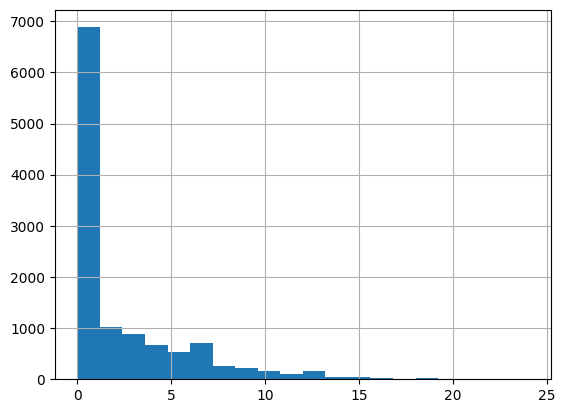

In [11]:
df = Plotter(customer_activity_data_transform)

df.create_hist('administrative')

### Creating a qqplot of a selected column

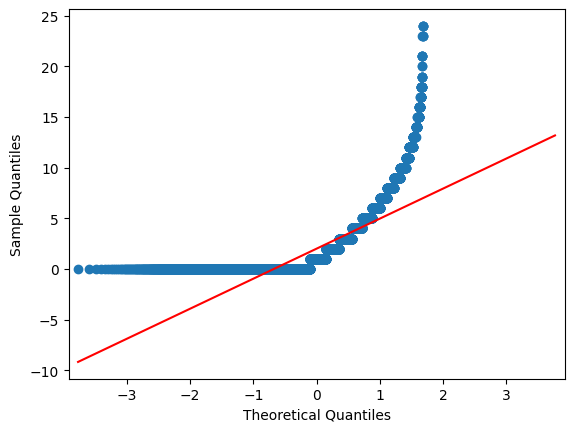

In [12]:
df = Plotter(customer_activity_data_transform)

df.create_qqplot('administrative')

### Dropping unnecessary data

In [13]:
df = DataFrameTransform(customer_activity_data_transform)

# Removes the extra index column
customer_activity_dropped_values = df.drop_column('Unnamed: 0')
customer_activity_dropped_values = df.drop_missing_values_in_column('operating_systems')
customer_activity_dropped_values = df.drop_missing_values_in_column('product_related_duration')
customer_activity_dropped_values = df.drop_missing_values_in_column('informational_duration')
customer_activity_dropped_values = df.drop_missing_values_in_column('product_related')

customer_activity_dropped_values

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.00,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.00,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.00,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.0,0,0.00,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.0,0,0.00,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.0,0.0,0,0.00,16.0,262.0,0.0100,0.034,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,NaN,134.0,4,112.22,48.0,1898.0,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5.0,NaN,1,0.00,67.0,2202.0,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0.0,0.0,0,0.00,13.0,316.0,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


### Viewing the value counts of a categorical column

In [14]:
customer_activity_dropped_values['product_related'].value_counts()

product_related
1.0      543
2.0      411
3.0      407
5.0      369
6.0      361
        ... 
278.0      1
279.0      1
282.0      1
485.0      1
291.0      0
Name: count, Length: 296, dtype: int64

### Imputing data

In [15]:
df = DataFrameTransform(customer_activity_dropped_values)

customer_activity_imputation = df.median_imputation('administrative_duration')
customer_activity_imputation = df.categorical_imputation_mode('administrative')
customer_activity_imputation


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.00,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.00,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.00,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.0,0,0.00,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.0,0,0.00,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.0,0.0,0,0.00,16.0,262.0,0.0100,0.034,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0.0,134.0,4,112.22,48.0,1898.0,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5.0,6.0,1,0.00,67.0,2202.0,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0.0,0.0,0,0.00,13.0,316.0,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


### Viewing null data after imputating and dropping 

In [16]:
df = DataFrameInfo(customer_activity_imputation)

#df.get_info()
df.null_percentage()

administrative              0.0
administrative_duration     0.0
informational               0.0
informational_duration      0.0
product_related             0.0
product_related_duration    0.0
bounce_rates                0.0
exit_rates                  0.0
page_values                 0.0
month                       0.0
operating_systems           0.0
browser                     0.0
region                      0.0
traffic_type                0.0
visitor_type                0.0
weekend                     0.0
revenue                     0.0
dtype: float64

In [17]:
customer_activity_imputation

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.00,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.00,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.00,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.0,0,0.00,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.0,0,0.00,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.0,0.0,0,0.00,16.0,262.0,0.0100,0.034,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0.0,134.0,4,112.22,48.0,1898.0,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5.0,6.0,1,0.00,67.0,2202.0,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0.0,0.0,0,0.00,13.0,316.0,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


### converting float columns to ints

In [18]:
df_for_int_conversion = DataTransform(customer_activity_imputation)

customer_activity_skewed = df_for_int_conversion.column_to_int('administrative')
customer_activity_skewed = df_for_int_conversion.column_to_int('administrative_duration')
customer_activity_skewed = df_for_int_conversion.column_to_int('product_related')
customer_activity_skewed = df_for_int_conversion.column_to_int('product_related_duration')

customer_activity_skewed

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0,0,0.00,4,0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0,0,0.00,26,876,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,99,0,0.00,19,368,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0,0,0.00,20,1432,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0,0,0.00,33,694,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0,0,0.00,16,262,0.0100,0.034,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,134,4,112.22,48,1898,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,6,1,0.00,67,2202,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0,0,0.00,13,316,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


### Measuring Skew, visulising with hist and qqplot

### Followed by the normalisation of data

The skew of administrative_duration is: 4.867935719472691


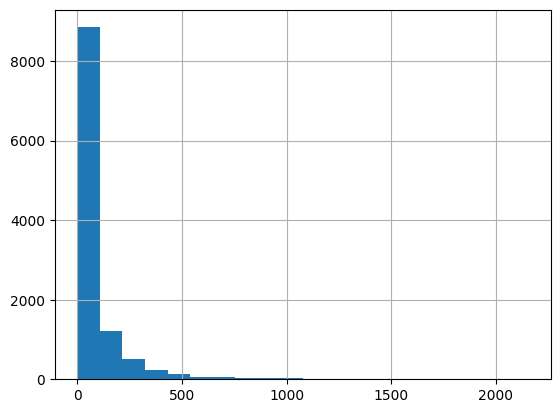

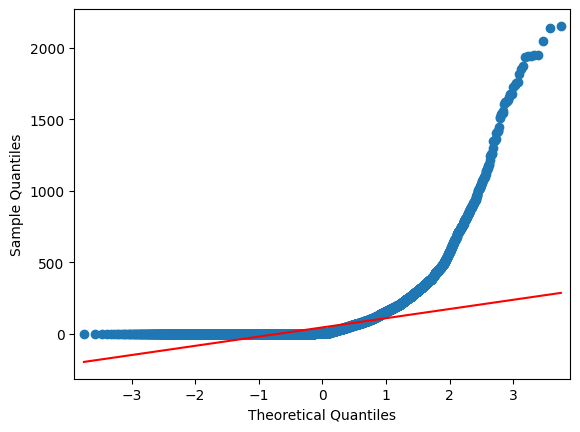

count    11235.000000
mean        78.988607
std        174.555581
min          0.000000
25%          0.000000
50%          6.000000
75%         87.000000
max       2155.000000
Name: administrative_duration, dtype: float64

In [19]:
df = Plotter(customer_activity_skewed)
df2 = DataFrameInfo(customer_activity_skewed)
df.show_skew('administrative_duration')
df.create_qqplot('administrative_duration')
df2.describe_column('administrative_duration')

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.00,4,0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.00,26,876,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.00,19,368,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.00,20,1432,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.00,33,694,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.00,16,262,0.0100,0.034,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,112.22,48,1898,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.00,67,2202,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.00,13,316,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


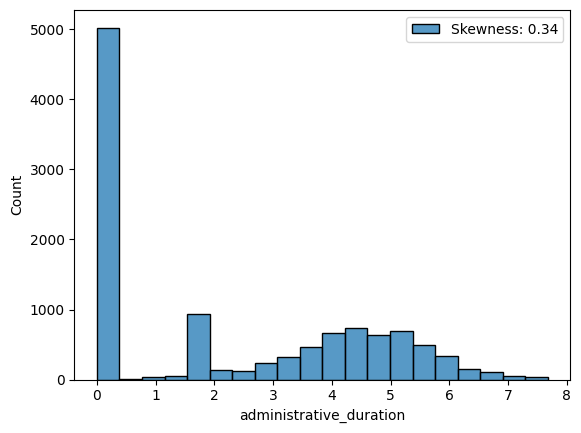

In [20]:
df_normalise = DataFrameTransform(customer_activity_skewed)

customer_activity_normalised = df_normalise.log_transform('administrative_duration')
customer_activity_normalised

The skew of informational_duration is: 7.210292886489951


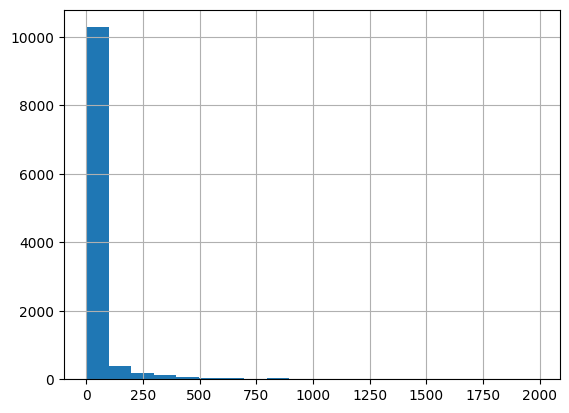

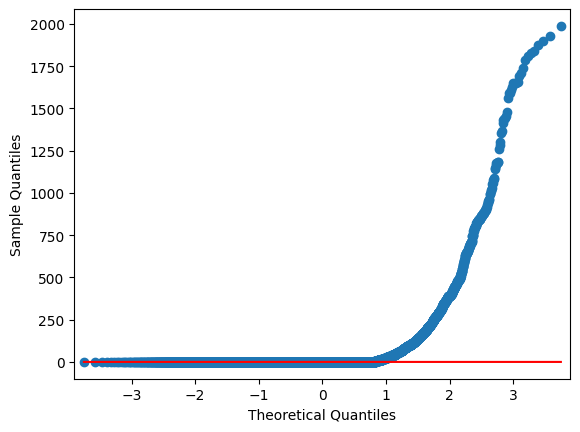

count    11235.000000
mean        34.418279
std        135.865038
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1988.750000
Name: informational_duration, dtype: float64

In [21]:
df = Plotter(customer_activity_normalised)
df.show_skew('informational_duration')
df.create_qqplot('informational_duration')
df2.describe_column('informational_duration')

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,876,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,368,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,1432,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,694,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.000000,16,262,0.0100,0.034,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,4.720461,48,1898,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.000000,67,2202,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.000000,13,316,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


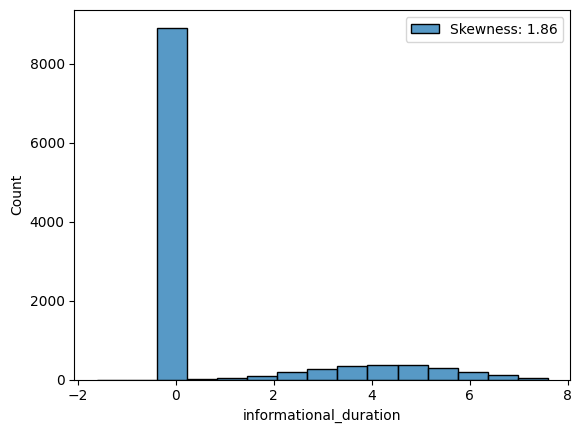

In [22]:
df_normalise = DataFrameTransform(customer_activity_skewed)

customer_activity_normalised = df_normalise.log_transform('informational_duration')
customer_activity_normalised

The skew of product_related_duration is: 3.5838087231359945


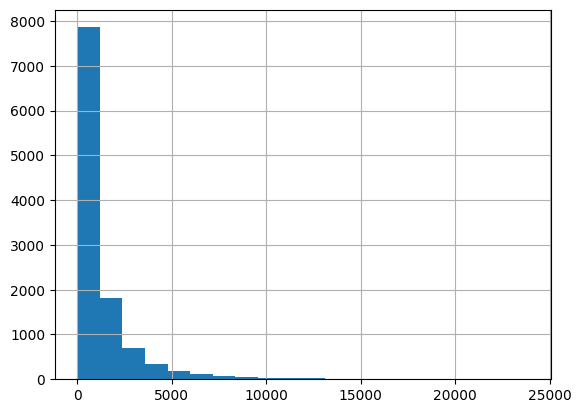

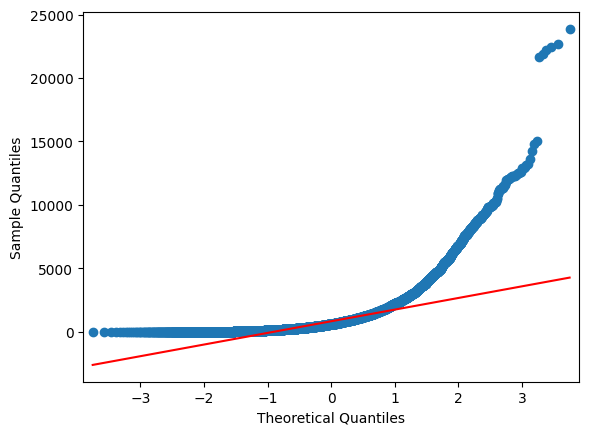

count    11235.000000
mean      1203.971607
std       1780.405270
min          0.000000
25%        194.000000
50%        589.000000
75%       1433.000000
max      23866.000000
Name: product_related_duration, dtype: float64

In [23]:
df = Plotter(customer_activity_skewed)
df.show_skew('product_related_duration')
df.create_qqplot('product_related_duration')
df2.describe_column('product_related_duration')

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0.000000,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,6.775366,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,5.908083,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,7.266827,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,6.542472,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.000000,16,5.568345,0.0100,0.034,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,4.720461,48,7.548556,0.0030,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.000000,67,7.697121,0.0276,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.000000,13,5.755742,0.0000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


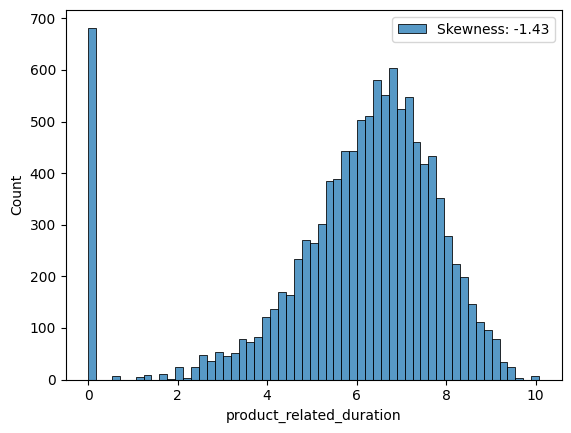

In [24]:
df_normalise = DataFrameTransform(customer_activity_skewed)

customer_activity_normalised = df_normalise.log_transform('product_related_duration')
customer_activity_normalised

The skew of bounce_rates is: 2.9846350559462755


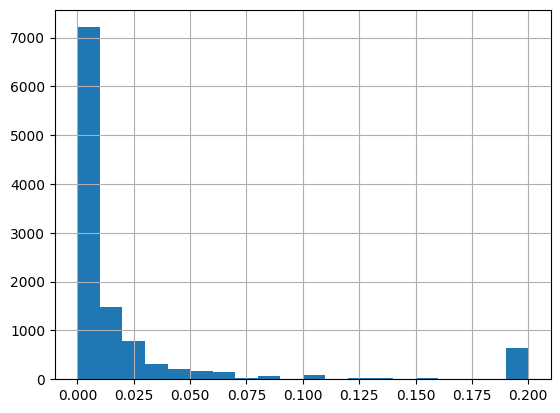

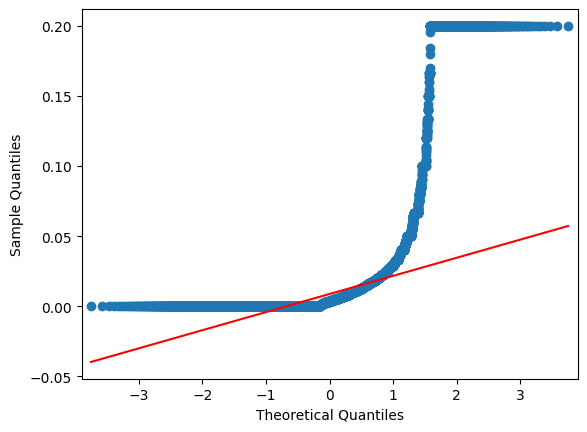

count    11235.000000
mean         0.022103
std          0.048335
min          0.000000
25%          0.000000
50%          0.003500
75%          0.017450
max          0.200000
Name: bounce_rates, dtype: float64

In [25]:
df = Plotter(customer_activity_skewed)
df.show_skew('bounce_rates')
df.create_qqplot('bounce_rates')
df2.describe_column('bounce_rates')

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0.000000,-1.609438,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,6.775366,0.000000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,5.908083,-3.228926,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,7.266827,-3.696912,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,6.542472,-4.261580,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.000000,16,5.568345,-4.605170,0.034,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,4.720461,48,7.548556,-5.809143,0.007,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.000000,67,7.697121,-3.589940,0.069,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.000000,13,5.755742,0.000000,0.017,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


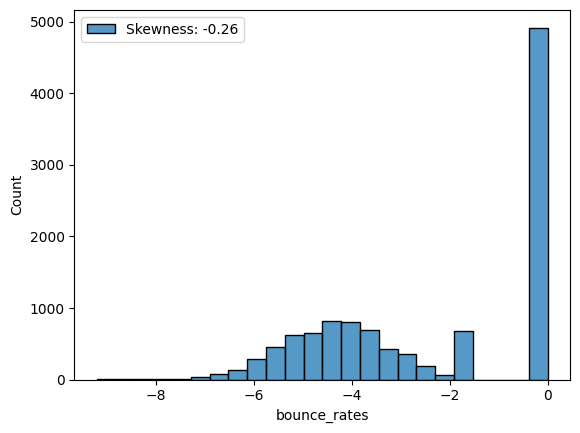

In [26]:
df_normalise = DataFrameTransform(customer_activity_skewed)

customer_activity_normalised = df_normalise.log_transform('bounce_rates')
customer_activity_normalised

The skew of exit_rates is: 2.2198991723461474


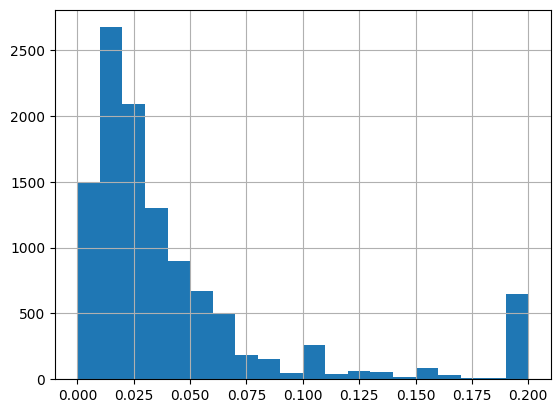

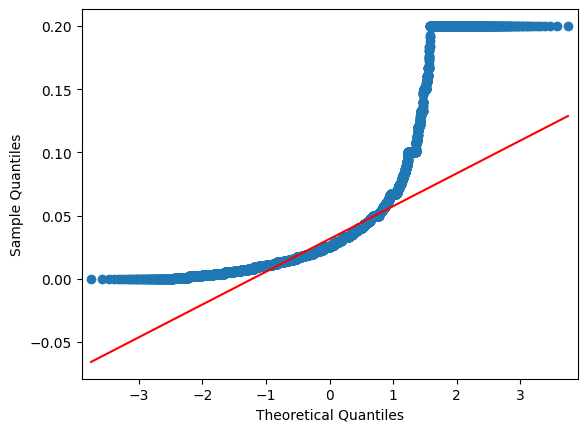

count    11235.000000
mean         0.042538
std          0.048089
min          0.000000
25%          0.014000
50%          0.025000
75%          0.049000
max          0.200000
Name: exit_rates, dtype: float64

In [27]:
df = Plotter(customer_activity_skewed)
df.show_skew('exit_rates')
df.create_qqplot('exit_rates')
df2.describe_column('exit_rates')

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0.000000,-1.609438,-1.609438,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,6.775366,0.000000,-3.649659,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,5.908083,-3.228926,-2.956512,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,7.266827,-3.696912,-3.575551,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,6.542472,-4.261580,-3.442019,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.000000,16,5.568345,-4.605170,-3.381395,0.0,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,4.720461,48,7.548556,-5.809143,-4.961845,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.000000,67,7.697121,-3.589940,-2.673649,0.0,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.000000,13,5.755742,0.000000,-4.074542,0.0,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


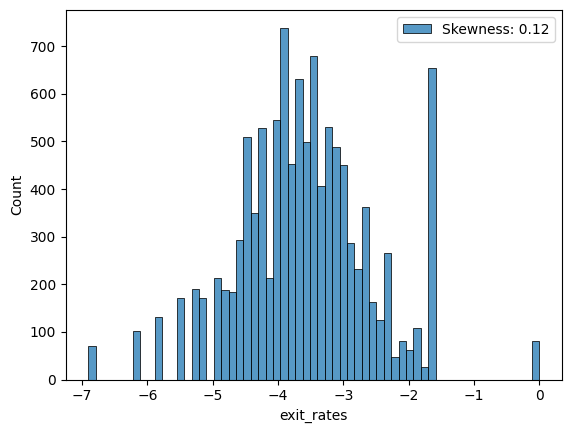

In [28]:
df_normalise = DataFrameTransform(customer_activity_skewed)

customer_activity_normalised = df_normalise.log_transform('exit_rates')
customer_activity_normalised

The skew of page_values is: 6.1904053579948055


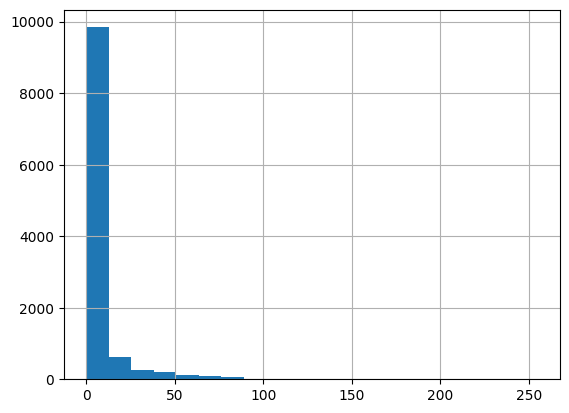

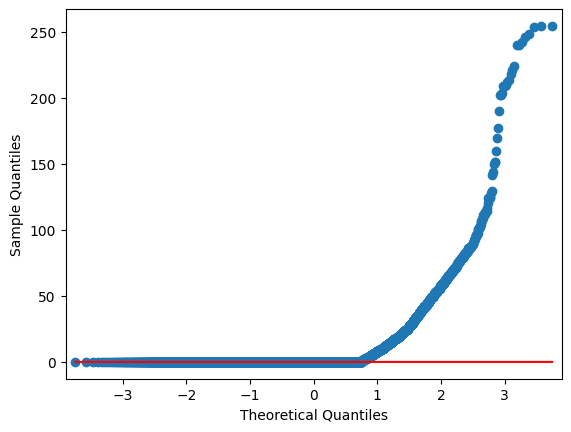

count    11235.000000
mean         5.517472
std         17.392007
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        254.600000
Name: page_values, dtype: float64

In [29]:
df = Plotter(customer_activity_skewed)
df.show_skew('page_values')
df.create_qqplot('page_values')
df2.describe_column('page_values')

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0.000000,-1.609438,-1.609438,0.000000,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,6.775366,0.000000,-3.649659,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,5.908083,-3.228926,-2.956512,0.000000,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,7.266827,-3.696912,-3.575551,0.587787,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,6.542472,-4.261580,-3.442019,0.000000,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.000000,16,5.568345,-4.605170,-3.381395,0.000000,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,4.720461,48,7.548556,-5.809143,-4.961845,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.000000,67,7.697121,-3.589940,-2.673649,0.000000,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.000000,13,5.755742,0.000000,-4.074542,0.000000,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


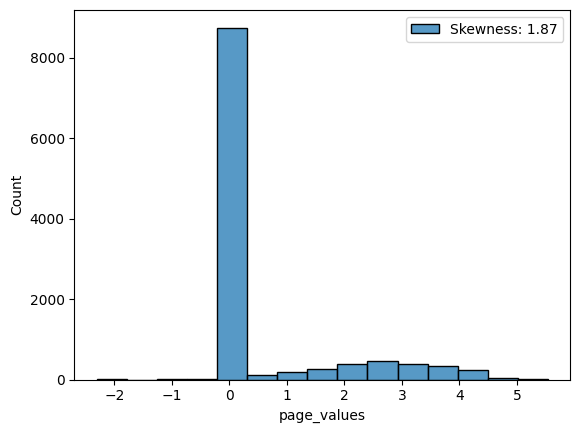

In [30]:
df_normalise = DataFrameTransform(customer_activity_skewed)

customer_activity_normalised = df_normalise.log_transform('page_values')
customer_activity_normalised

### The normalised dataframe

In [31]:
customer_activity_normalised

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0.000000,-1.609438,-1.609438,0.000000,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,6.775366,0.000000,-3.649659,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,5.908083,-3.228926,-2.956512,0.000000,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,7.266827,-3.696912,-3.575551,0.587787,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,6.542472,-4.261580,-3.442019,0.000000,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.000000,16,5.568345,-4.605170,-3.381395,0.000000,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,4.720461,48,7.548556,-5.809143,-4.961845,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.000000,67,7.697121,-3.589940,-2.673649,0.000000,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.000000,13,5.755742,0.000000,-4.074542,0.000000,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


### Finding outliers and removing them based on z score

In [32]:
customer_activity_z_scores = customer_activity_normalised
z_score_df = DataFrameTransform(customer_activity_z_scores)


customer_activity_z_scores = z_score_df.add_z_score('administrative_duration')
customer_activity_z_scores = z_score_df.remove_z_score_outliers('administrative_duration')
customer_activity_z_scores = z_score_df.add_z_score('informational_duration')
customer_activity_z_scores = z_score_df.remove_z_score_outliers('informational_duration')
customer_activity_z_scores = z_score_df.add_z_score('product_related_duration')
customer_activity_z_scores = z_score_df.remove_z_score_outliers('product_related_duration')
customer_activity_z_scores = z_score_df.add_z_score('bounce_rates')
customer_activity_z_scores = z_score_df.remove_z_score_outliers('bounce_rates')
customer_activity_z_scores = z_score_df.add_z_score('exit_rates')
customer_activity_z_scores = z_score_df.remove_z_score_outliers('exit_rates')
customer_activity_z_scores = z_score_df.add_z_score('page_values')
customer_activity_z_scores = z_score_df.remove_z_score_outliers('page_values')


customer_activity_z_scores


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0.000000,-1.609438,-1.609438,0.000000,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,6.775366,0.000000,-3.649659,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,5.908083,-3.228926,-2.956512,0.000000,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,7.266827,-3.696912,-3.575551,0.587787,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,6.542472,-4.261580,-3.442019,0.000000,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.000000,16,5.568345,-4.605170,-3.381395,0.000000,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,4.720461,48,7.548556,-5.809143,-4.961845,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.000000,67,7.697121,-3.589940,-2.673649,0.000000,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.000000,13,5.755742,0.000000,-4.074542,0.000000,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


In [33]:
customer_activity_z_scores = z_score_df.add_z_score('informational_duration')
customer_activity_z_scores = z_score_df.remove_z_score_outliers('informational_duration')
customer_activity_z_scores

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0.000000,-1.609438,-1.609438,0.000000,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,6.775366,0.000000,-3.649659,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,5.908083,-3.228926,-2.956512,0.000000,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,7.266827,-3.696912,-3.575551,0.587787,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,6.542472,-4.261580,-3.442019,0.000000,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.000000,0,0.000000,16,5.568345,-4.605170,-3.381395,0.000000,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
12325,0,4.897840,4,4.720461,48,7.548556,-5.809143,-4.961845,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
12326,5,1.791759,1,0.000000,67,7.697121,-3.589940,-2.673649,0.000000,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
12327,0,0.000000,0,0.000000,13,5.755742,0.000000,-4.074542,0.000000,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


### Finding overly correlated columns


In [34]:
import plotly.express as px
heatmap_df = customer_activity_z_scores
heatmap_df = heatmap_df.drop(columns=['month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type'])
heatmap_df
px.imshow(heatmap_df.corr(), title='Correlation heatmap of customer activity dataframe')


In [35]:
import statsmodels.formula.api as smf

model0 = smf.ols("administrative ~ administrative_duration", heatmap_df).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         administrative   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                 1.135e+04
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:17:22   Log-Likelihood:                -23752.
No. Observations:               10635   AIC:                         4.751e+04
Df Residuals:                   10633   BIC:                         4.752e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.1222      0.030     -4.022      0.000      -0.182      -0.063
administrative_duration     1.0196      0.010    106.515      0.000       1.001       1.038
==============================================================================
Omnibus:                     4644.392   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43005.583
Skew:                           1.857   Prob(JB):                         0.00
Kurtosis:                      12.124   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model1 = smf.ols("product_related ~ product_related_duration", heatmap_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        product_related   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     4612.
Date:                Sun, 12 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:17:22   Log-Likelihood:                -53248.
No. Observations:               10635   AIC:                         1.065e+05
Df Residuals:                   10633   BIC:                         1.065e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -36.9265      1.069    -34.545      0.000     -39.022     -34.831
product_related_duration    11.5879      0.171     67.913      0.000      11.253      11.922
==============================================================================
Omnibus:                     8122.487   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186131.397
Skew:                           3.520   Prob(JB):                         0.00
Kurtosis:                      22.248   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
cleaned_df = customer_activity_z_scores.reset_index()
cleaned_df = cleaned_df.drop(['index'], axis=1)
cleaned_df

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0,0.000000,0,0.000000,4,0.000000,-1.609438,-1.609438,0.000000,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,26,6.775366,0.000000,-3.649659,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2,4.595120,0,0.000000,19,5.908083,-3.228926,-2.956512,0.000000,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,20,7.266827,-3.696912,-3.575551,0.587787,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0,0.000000,0,0.000000,33,6.542472,-4.261580,-3.442019,0.000000,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10630,0,0.000000,0,0.000000,16,5.568345,-4.605170,-3.381395,0.000000,Dec,Windows,Google Chrome,North America,Facebook ads,Returning_Visitor,False,False
10631,0,4.897840,4,4.720461,48,7.548556,-5.809143,-4.961845,0.000000,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
10632,5,1.791759,1,0.000000,67,7.697121,-3.589940,-2.673649,0.000000,Aug,Windows,Google Chrome,Southern Africa,Facebook ads,Returning_Visitor,False,False
10633,0,0.000000,0,0.000000,13,5.755742,0.000000,-4.074542,0.000000,Dec,Windows,Google Chrome,South America,Google search,New_Visitor,False,False


In [43]:
cleaned_df.to_csv('clean_customer_activity.csv', encoding='utf-8', index=False)